In [1]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd             # Data manipulation library
import numpy as np              # Numerical computing library

# Data visualization libraries
import seaborn as sns           # Data visualization library based on Matplotlib
import matplotlib.pyplot as plt # Matplotlib for creating plots
import matplotlib.image as img  # Matplotlib extension for working with images

# Image processing and computer vision library
import cv2                      # OpenCV for image processing

# Iteration utilities
import itertools

# File and directory handling
import pathlib

# Suppress Python warnings
import warnings

# Python Imaging Library for image handling
from PIL import Image

# Random number generation
from random import randint

# Import machine learning and deep learning libraries
from imblearn.over_sampling import SMOTE         # SMOTE for oversampling
from sklearn.model_selection import train_test_split  # Scikit-learn for splitting data
from sklearn.metrics import matthews_corrcoef as MCC   # MCC metric
from sklearn.metrics import balanced_accuracy_score as BAS # Balanced accuracy score metric
from sklearn.metrics import classification_report, confusion_matrix # Classification metrics

# Deep learning frameworks
from tensorflow import keras
from keras import layers
import tensorflow as tf
import tensorflow_addons as tfa

# Dataset handling
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Utility for plotting Keras models
from keras.utils.vis_utils import plot_model

# Neural network building blocks
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D

# Directory operations
from distutils.dir_util import copy_tree, remove_tree

# Operating system utilities
import os

# Print the contents of a directory
print(os.listdir("../input/alzheimer-mri-dataset/Dataset"))

# Print TensorFlow version
print("TensorFlow Version:", tf.__version__)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['Non_Demented', 'Mild_Demented', 'Moderate_Demented', 'Very_Mild_Demented']
TensorFlow Version: 2.12.0


/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
# Install the 'split-folders' library using pip
!pip install split-folders

# Import the 'splitfolders' library
import splitfolders

# Use 'splitfolders' to split a dataset into training, validation, and test sets
# The dataset is located in the '../input/alzheimer-mri-dataset/Dataset' directory
# The data will be split into a training set (80%), a validation set (10%), and a test set (10%)
# The 'seed' parameter is set for reproducibility
splitfolders.ratio('../input/alzheimer-mri-dataset/Dataset', output="output", seed=1345, ratio=(.8, 0.1, 0.1))


Copying files: 6400 files [00:47, 134.40 files/s]


In [3]:
# Define image dimensions
IMG_HEIGHT = 128
IMG_WIDTH = 128

# Create a training dataset using images from the "./output/train" directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./output/train",  # Directory containing training images
    seed=123,           # Random seed for shuffling (for reproducibility)
    image_size=(IMG_HEIGHT, IMG_WIDTH),  # Target image size
    batch_size=64       # Batch size for training
)

# Create a test dataset using images from the "./output/test" directory
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./output/test",    # Directory containing test images
    seed=123,           # Random seed for shuffling (for reproducibility)
    image_size=(IMG_HEIGHT, IMG_WIDTH),  # Target image size
    batch_size=64       # Batch size for testing
)

# Create a validation dataset using images from the "./output/val" directory
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./output/val",     # Directory containing validation images
    seed=123,           # Random seed for shuffling (for reproducibility)
    image_size=(IMG_HEIGHT, IMG_WIDTH),  # Target image size
    batch_size=64       # Batch size for validation
)


Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


In [4]:
# Get class names from the training dataset
class_names = train_ds.class_names

# Print the class names
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


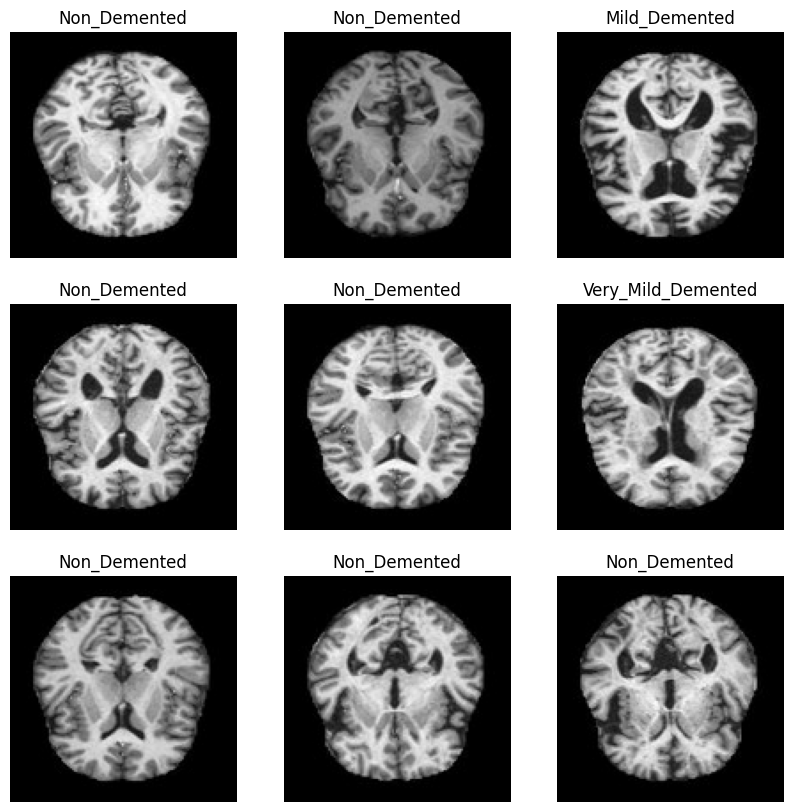

In [5]:
# Create a new figure for plotting with a specified size (10x10 inches)
plt.figure(figsize=(10, 10))

# Iterate over the first batch of images and labels in the training dataset (train_ds.take(1))
for images, labels in train_ds.take(1):
    # Loop through the first 9 images in the batch
    for i in range(9):
        # Create a subplot (3x3 grid), and set the current subplot as 'ax'
        ax = plt.subplot(3, 3, i + 1)
        
        # Display the image using matplotlib. Convert it to 'uint8' data type.
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Set the title of the subplot to the corresponding class name using 'class_names' list
        plt.title(class_names[labels[i]])
        
        # Turn off axis labels and ticks for cleaner visualization
        plt.axis("off")


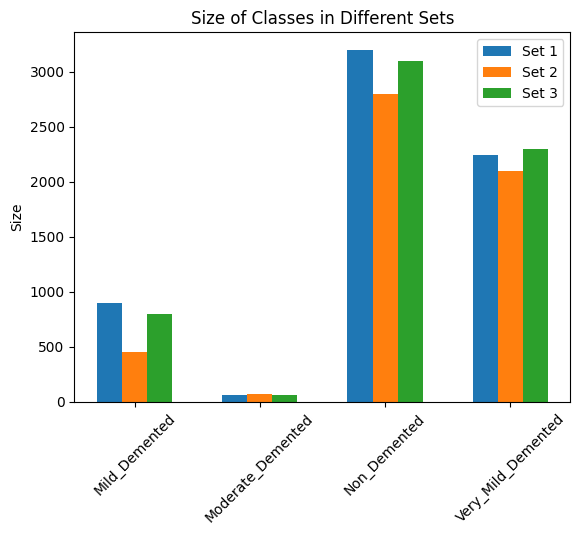

In [6]:
import numpy as np  # Import numpy for numerical operations

# Create data for multiple sets (you can replace these with your actual data)
set1 = [896, 64, 3200, 2240]  # Size data for the first set
set2 = [450, 75, 2800, 2100]  # Size data for the second set
set3 = [800, 60, 3100, 2300]  # Size data for the third set

# Define the width of each bar and the number of classes
width = 0.2
x = np.arange(len(class_names))

# Create subplots for each set
fig, ax = plt.subplots()

# Plot the bars for each set, adjusting the x-position to avoid overlap
ax.bar(x - width, set1, width, label='Set 1')
ax.bar(x, set2, width, label='Set 2')
ax.bar(x + width, set3, width, label='Set 3')

# Customize the plot
ax.set_ylabel('Size')
ax.set_title('Size of Classes in Different Sets')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45)
ax.legend()

# Show the plot
plt.show()


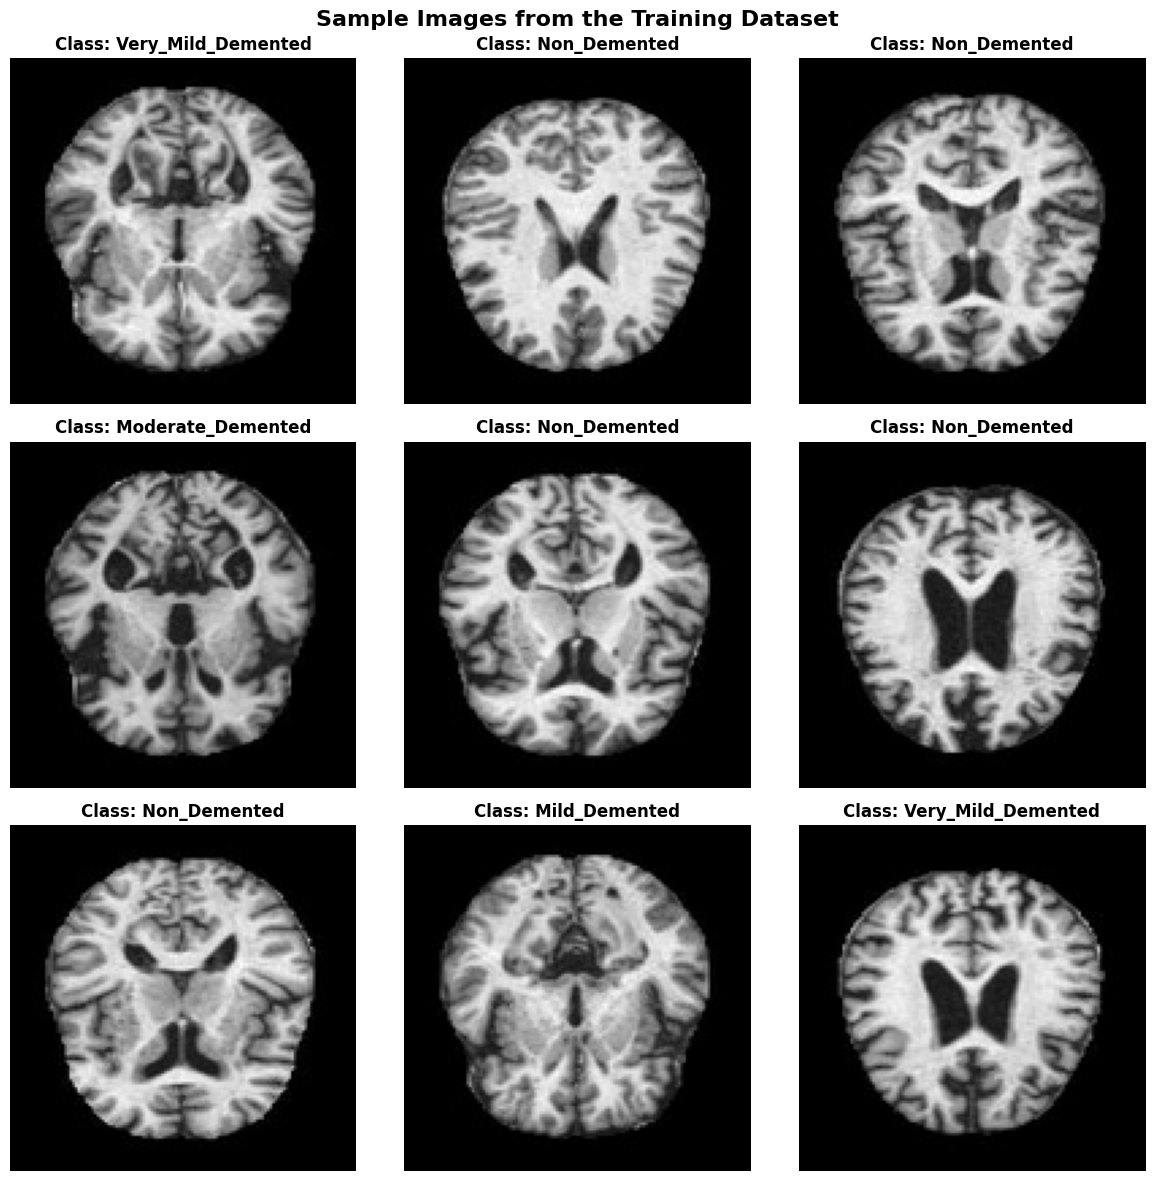

In [7]:
import matplotlib.pyplot as plt

# Create a 3x3 grid for displaying images
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Class: {class_names[labels[i]]}", fontsize=12, fontweight='bold')
        plt.axis("off")

# Add an overall title to the grid
plt.suptitle("Sample Images from the Training Dataset", fontsize=16, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [8]:
# Create a Sequential model
model = keras.models.Sequential()

# Preprocessing layer: Rescale pixel values to the range [0, 1]
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# Convolutional Layer 1: 16 filters, 3x3 kernel size, ReLU activation, He normal initialization, and 'same' padding
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))

# MaxPooling Layer 1: 2x2 pool size
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2: 32 filters, 3x3 kernel size, ReLU activation, He normal initialization, and 'same' padding
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))

# MaxPooling Layer 2: 2x2 pool size
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Dropout Layer 1: 20% dropout rate to prevent overfitting
model.add(keras.layers.Dropout(0.20))

# Convolutional Layer 3: 64 filters, 3x3 kernel size, ReLU activation, He normal initialization, and 'same' padding
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))

# MaxPooling Layer 3: 2x2 pool size
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Dropout Layer 2: 25% dropout rate
model.add(keras.layers.Dropout(0.25))

# Flatten Layer: Flatten the 2D feature maps to a 1D vector
model.add(keras.layers.Flatten())

# Dense Layer 1: 128 units, ReLU activation, He normal initialization
model.add(keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))

# Dense Layer 2: 64 units, ReLU activation
model.add(keras.layers.Dense(64, activation="relu"))

# Output Layer: 4 units with softmax activation for multi-class classification
model.add(keras.layers.Dense(4, activation="softmax"))


In [9]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",  # Loss function for multi-class classification
    optimizer="Adam",                        # Optimizer (Adam is a common choice)
    metrics=["accuracy"]                     # Evaluation metric (accuracy in this case)
)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [11]:
# Train the model using the 'fit' method
hist = model.fit(
    train_ds,           # Training dataset
    validation_data=val_ds,  # Validation dataset (used to evaluate the model during training)
    epochs=15,          # Number of training epochs
    batch_size=64,      # Batch size for each training iteration
    verbose=1           # Verbosity level (1: progress bar, 0: no progress output)
)


Epoch 1/15


2023-09-11 17:17:32.285273: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


80/80 [==============================] - 12s 36ms/step - loss: 1.4154 - accuracy: 0.4950 - val_loss: 1.1614 - val_accuracy: 0.4836
Epoch 2/15
80/80 [==============================] - 2s 28ms/step - loss: 0.9152 - accuracy: 0.5587 - val_loss: 1.1057 - val_accuracy: 0.5102
Epoch 3/15
80/80 [==============================] - 2s 27ms/step - loss: 0.8959 - accuracy: 0.5747 - val_loss: 0.9447 - val_accuracy: 0.5994
Epoch 4/15
80/80 [==============================] - 2s 27ms/step - loss: 0.8494 - accuracy: 0.6029 - val_loss: 0.9508 - val_accuracy: 0.5775
Epoch 5/15
80/80 [==============================] - 2s 27ms/step - loss: 0.8145 - accuracy: 0.6263 - val_loss: 0.7176 - val_accuracy: 0.6635
Epoch 6/15
80/80 [==============================] - 3s 33ms/step - loss: 0.7335 - accuracy: 0.6753 - val_loss: 0.8644 - val_accuracy: 0.6495
Epoch 7/15
80/80 [==============================] - 2s 28ms/step - loss: 0.6937 - accuracy: 0.6976 - val_loss: 0.6825 - val_accuracy: 0.7089
Epoch 8/15
80/80 [=====

In [12]:
# Extract training accuracy values from the training history
get_ac = hist.history['accuracy']

# Extract training loss values from the training history
get_los = hist.history['loss']

# Extract validation accuracy values from the training history
val_acc = hist.history['val_accuracy']

# Extract validation loss values from the training history
val_loss = hist.history['val_loss']


In [13]:
epochs = range(len(get_ac))

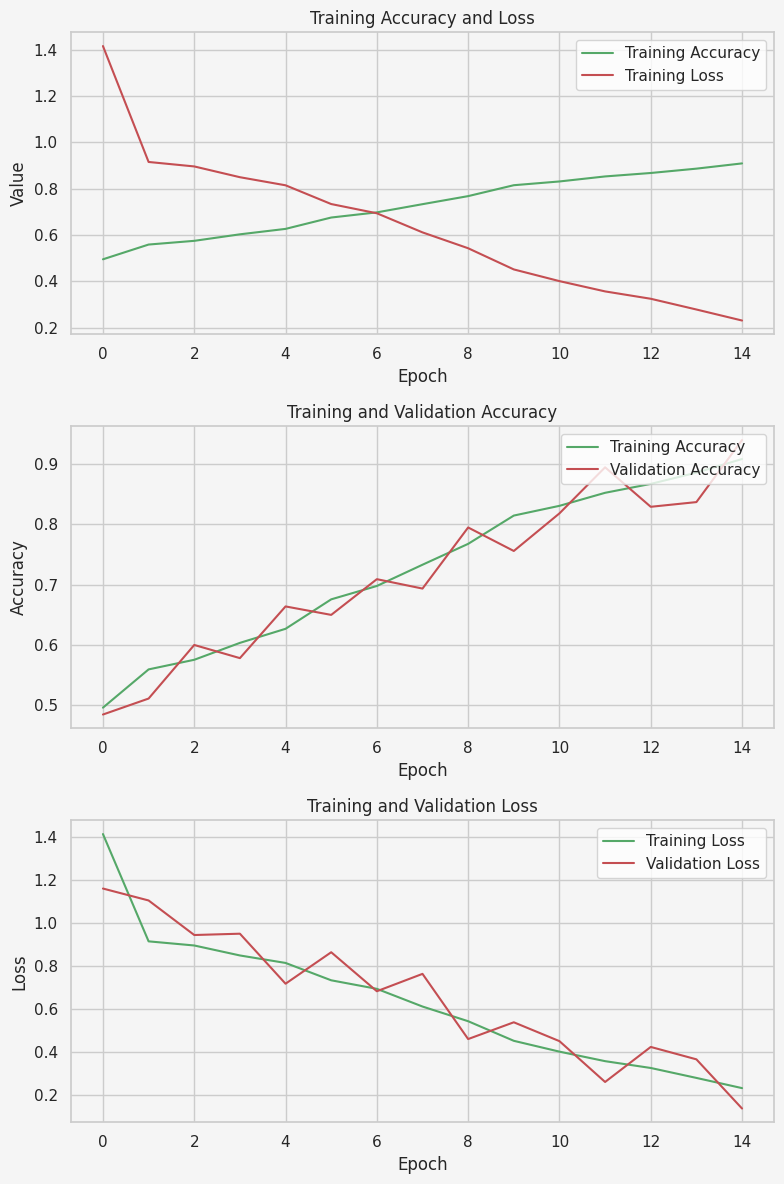

In [14]:
import seaborn as sns

# Set seaborn style and background color
sns.set(style="whitegrid")
background_color = "#f5f5f5"  # Specify your desired background color

# Create a figure with subplots and set the figure size
fig, axes = plt.subplots(3, 1, figsize=(8, 12), facecolor=background_color)

# Set the background color for each subplot
for ax in axes:
    ax.set_facecolor(background_color)

# Plot 1: Training accuracy and loss
axes[0].plot(epochs, get_ac, 'g', label='Training Accuracy')
axes[0].plot(epochs, get_los, 'r', label='Training Loss')
axes[0].set_title('Training Accuracy and Loss')
axes[0].legend(loc='upper right')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Value')

# Plot 2: Training and validation accuracy
axes[1].plot(epochs, get_ac, 'g', label='Training Accuracy')
axes[1].plot(epochs, val_acc, 'r', label='Validation Accuracy')
axes[1].set_title('Training and Validation Accuracy')
axes[1].legend(loc='upper right')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')

# Plot 3: Training and validation loss
axes[2].plot(epochs, get_los, 'g', label='Training Loss')
axes[2].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[2].set_title('Training and Validation Loss')
axes[2].legend(loc='upper right')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Loss')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with all the subplots
plt.show()


In [15]:
loss, accuracy = model.evaluate(test_ds)


11/11 [==============================] - 0s 14ms/step - loss: 0.1726 - accuracy: 0.9439


1/1 [==============================] - 0s 19ms/step


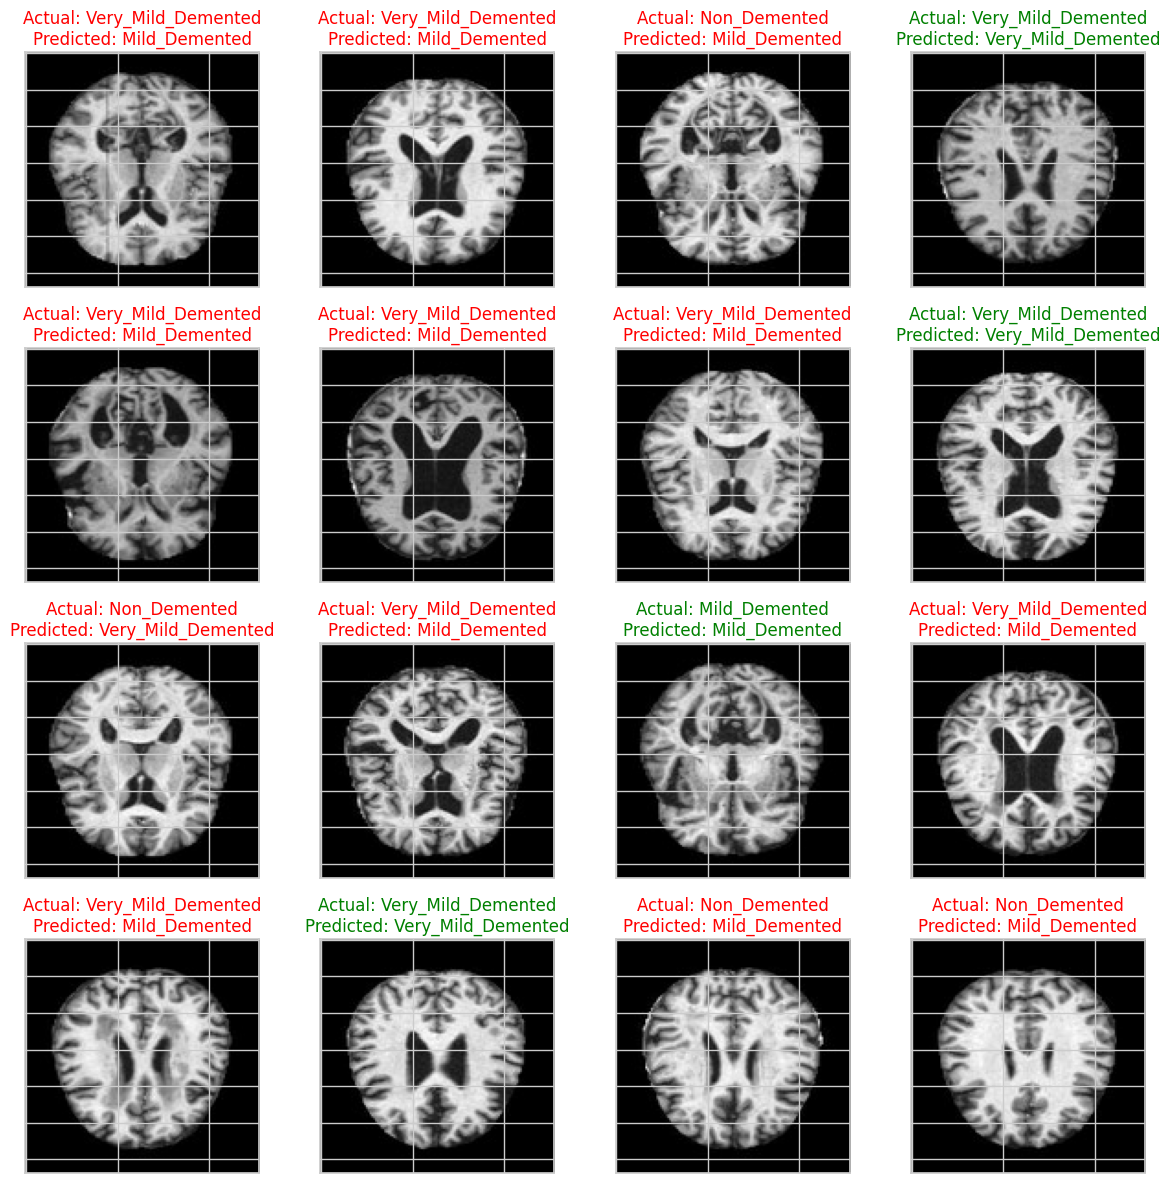

In [16]:
# Create a large figure for displaying multiple images
plt.figure(figsize=(12, 12))

# Iterate over the first batch of images and labels in the test dataset
for images, labels in test_ds.take(1):
    for i in range(16):
        # Create a subplot with 4 rows and 4 columns
        ax = plt.subplot(4, 4, i + 1)
        
        # Display the image as a uint8 array
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Make predictions for the current image
        predictions = model.predict(tf.expand_dims(images[i], 0))
        
        # Calculate the softmax score for the predictions
        score = tf.nn.softmax(predictions[0])
        
        # Determine if the prediction is correct (green text) or incorrect (red text)
        actual_class = class_names[labels[i]]
        predicted_class = class_names[np.argmax(score)]
        title_color = 'green' if actual_class == predicted_class else 'red'
        
        # Set the title with actual and predicted class names
        plt.title(f'Actual: {actual_class}\nPredicted: {predicted_class}', color=title_color)
        
        # Remove tick labels for a cleaner appearance
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset and make predictions
for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and F1-score for each class
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
f1 = f1_score(true_labels, predicted_labels, average=None)

# Print precision, recall, and F1-score for each class
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"F1-Score: {f1[i]:.2f}")
    print()

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)


1/1 [==============================] - 0s 18ms/step
Accuracy: 0.94
Class: Mild_Demented
Precision: 0.99
Recall: 0.87
F1-Score: 0.92

Class: Moderate_Demented
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Class: Non_Demented
Precision: 0.95
Recall: 0.97
F1-Score: 0.96

Class: Very_Mild_Demented
Precision: 0.92
Recall: 0.94
F1-Score: 0.93

Confusion Matrix:
[[ 79   0   3   9]
 [  0   7   0   0]
 [  0   0 310  10]
 [  1   0  13 210]]


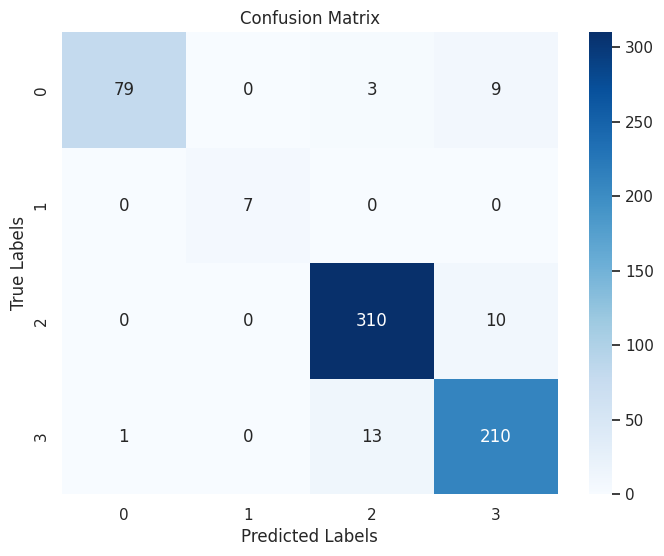

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


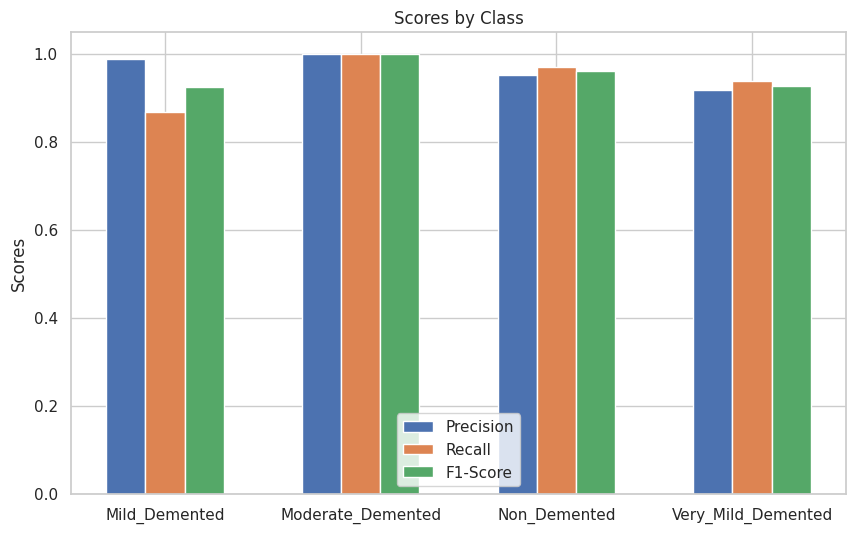

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create a bar chart for precision, recall, and F1-score
x = np.arange(len(class_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Scores by Class')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

plt.show()


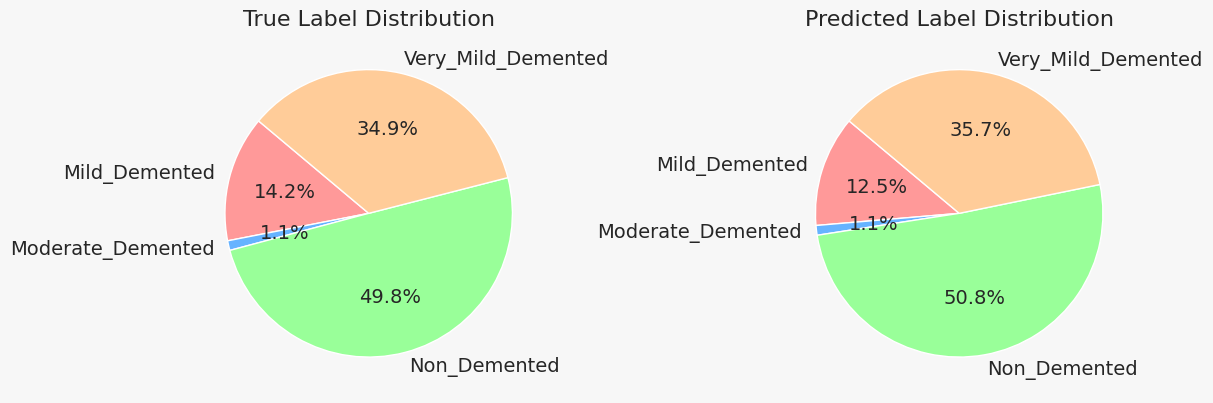

In [20]:
import matplotlib.pyplot as plt

# Data
true_label_counts = [true_labels.count(i) for i in range(len(class_names))]
predicted_label_counts = [predicted_labels.count(i) for i in range(len(class_names))]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Custom colors for slices
background_color = '#f7f7f7'  # Background color
labels = class_names

# Create a figure with two subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.patch.set_facecolor(background_color)  # Set background color of the figure

# Create a pie chart for true labels
axes[0].set_title('True Label Distribution', fontsize=16)
axes[0].pie(true_label_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_facecolor(background_color)  # Set background color of the subplot

# Create a pie chart for predicted labels
axes[1].set_title('Predicted Label Distribution', fontsize=16)
axes[1].pie(predicted_label_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_facecolor(background_color)  # Set background color of the subplot

# Adjust text size for labels and percentages
for ax in axes:
    for text in ax.texts:
        text.set_fontsize(14)

plt.tight_layout()
plt.show()
